In [152]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns

In [153]:
# TITLE_SIZE = 20
AX_TITLE_SIZE = 16
LABEL_SIZE = 14

In [154]:
params = {
    'text.usetex' : True,
    'font.size' : AX_TITLE_SIZE,
#     'font.family' : 'lmodern',
#     'text.latex.unicode': True,
}
plt.rcParams.update(params) 

fontP = FontProperties()
fontP.set_size(12)

In [155]:
def get_data(dist, test, small, LOOCV, maxpooling=False):
    file_name = dist
    if small:
        file_name += '_small'
    else:
        file_name += '_large'
    file_name += '_test' if test else '_train'
    if LOOCV:
        file_name += '_LOOCV'
    if maxpooling:
        file_name += '_maxpool'
    
    return np.loadtxt(r'../results/' + file_name + '.txt', delimiter=',', skiprows=1)

## Question A

In [156]:
eucl_test = get_data('euclidian', test=True, small=True, LOOCV=False)
eucl_train = get_data('euclidian', test=False, small=True, LOOCV=False)

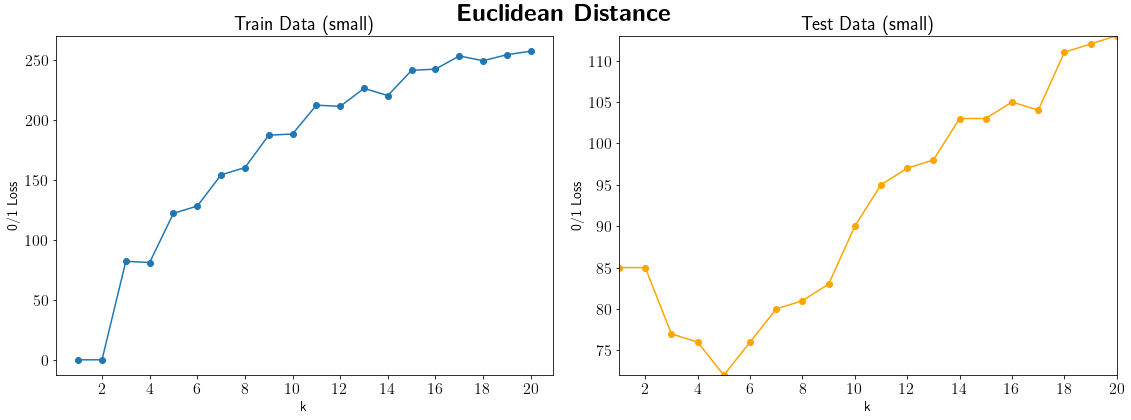

In [157]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(r'\Huge{\textbf{Euclidean Distance}}')

ax1.set_title(r'Train Data (small)')
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('0/1 Loss', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(0, len(eucl_train[:,1])+1, 2)])
ax1.plot(eucl_train[:,1], eucl_train[:,0], marker='o')

ax2.set_title(r'Test Data (small)')
ax2.set_xlabel('k', fontsize=LABEL_SIZE)
ax2.set_ylabel('0/1 Loss', fontsize=LABEL_SIZE)
ax2.set_xticks([x for x in range(0, len(eucl_test[:,1])+1, 2)])
ax2.plot(eucl_test[:,1], eucl_test[:,0], marker='o', color='orange')
plt.autoscale(tight=True)


fig.tight_layout()
# fig.subplots_adjust(top=.85)
fig.savefig(
    r'../figures/QA.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)

## Question B

In [158]:
eucl_train_LOOCV = get_data('euclidian', test=False, small=True, LOOCV=True)
eucl_test = get_data('euclidian', test=True, small=True, LOOCV=False)
eucl_train_LOOCV_risk = eucl_train_LOOCV[:, 0]/2999

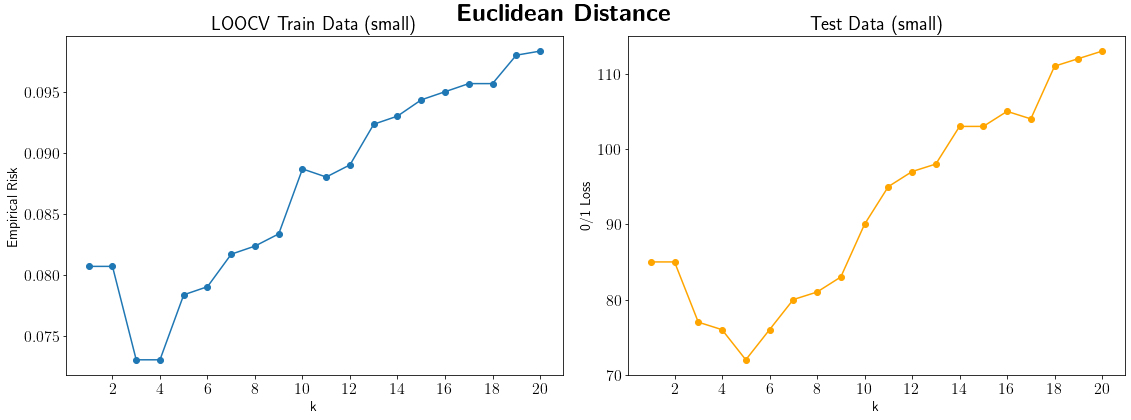

In [159]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(r'\Huge{\textbf{Euclidean Distance}}')

ax1.set_title(r'LOOCV Train Data (small)')
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(0, len(eucl_train_LOOCV[:,1])+1, 2)])
ax1.plot(eucl_train_LOOCV[:,1], eucl_train_LOOCV_risk, marker='o')

ax2.set_title(r'Test Data (small)')
ax2.set_xlabel('k', fontsize=LABEL_SIZE)
ax2.set_ylabel('0/1 Loss', fontsize=LABEL_SIZE)
ax2.set_xticks([x for x in range(0, len(eucl_test[:,1])+1, 2)])
ax2.plot(eucl_test[:,1], eucl_test[:,0], marker='o', color='orange')


fig.tight_layout()
# fig.subplots_adjust(top=.905)
fig.savefig(
    r'../figures/QB.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)

## Question C

In [160]:
min_train_LOOCV = get_data('minkowski', test=False, small=True, LOOCV=True)
min_test = get_data('minkowski', test=True, small=True, LOOCV=False)
min_train_LOOCV_risk = min_train_LOOCV[:, 0]/2999

In [161]:
min_train_LOOCV[np.where(min_train_LOOCV[:, 2] == 4)]

array([[220.,   1.,   4.],
       [220.,   2.,   4.],
       [196.,   3.,   4.],
       [201.,   4.,   4.],
       [208.,   5.,   4.],
       [222.,   6.,   4.],
       [230.,   7.,   4.],
       [226.,   8.,   4.],
       [227.,   9.,   4.],
       [231.,  10.,   4.],
       [233.,  11.,   4.],
       [247.,  12.,   4.],
       [248.,  13.,   4.],
       [242.,  14.,   4.],
       [265.,  15.,   4.],
       [259.,  16.,   4.],
       [265.,  17.,   4.],
       [263.,  18.,   4.],
       [276.,  19.,   4.],
       [275.,  20.,   4.]])

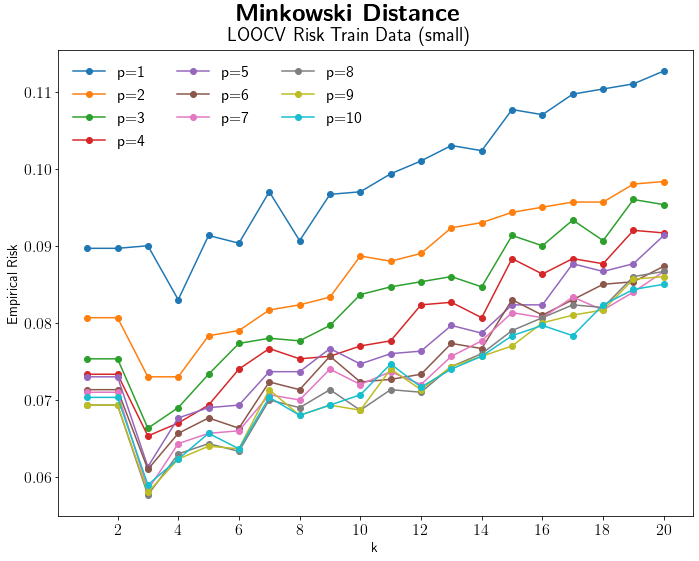

In [162]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
# fig.suptitle('Minkowski Distance\nLOOCV Train Data', fontsize=TITLE_SIZE)
# fig.suptitle(r"""\Huge{Minkowski Distance} \newline  \large{Small subtitle !}""", ha='center')

fig.suptitle(
    r"\Huge{\textbf{Minkowski Distance}}" "\n" r"LOOCV Risk Train Data (small)",
#     y=1.01
)

# ax1.set_title('LOOCV Train Data', fontsize=AX_TITLE_SIZE)
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(0, len(eucl_train_LOOCV[:,1])+1, 2)])
for p in np.sort(np.unique(min_train_LOOCV[:, 2])):
    p_results = np.where(min_train_LOOCV[:, 2] == p)
    ax1.plot(
        min_train_LOOCV[p_results][:, 1],
        min_train_LOOCV_risk[p_results],
        marker='o',
        label=f'p={int(p)}'
    )

# ax1.set_yscale('log')    
ax1.legend(
    loc='upper left',
#     fancybox=True,
#     prop=fontP,
    ncol=3,
    frameon=False
)

fig.tight_layout()
fig.subplots_adjust(top=.905)
fig.savefig(
    r'../figures/QC.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)

## Question D

In [163]:
min_train_LOOCV = get_data('minkowski', test=False, small=True, LOOCV=True, maxpooling=True)
# min_test = get_data('minkowski', test=True, small=True, LOOCV=False)
min_train_LOOCV_risk = min_train_LOOCV[:, 0]/2999

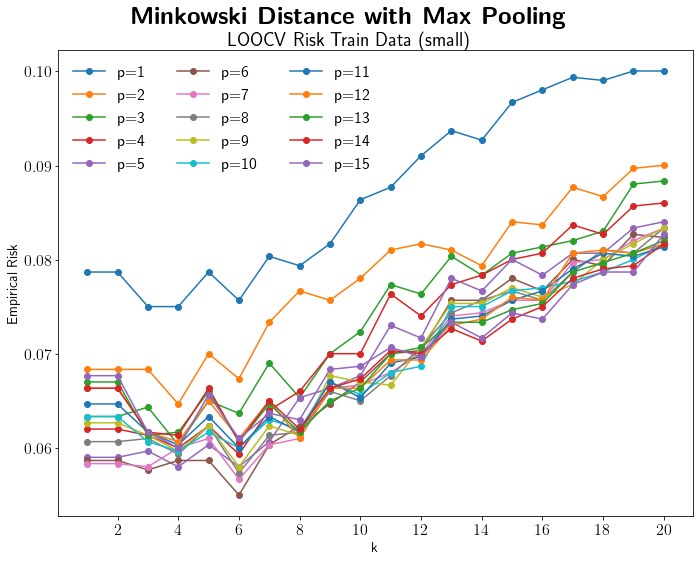

In [164]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
# fig.suptitle('Minkowski Distance\nLOOCV Train Data', fontsize=TITLE_SIZE)
# fig.suptitle(r"""\Huge{Minkowski Distance} \newline  \large{Small subtitle !}""", ha='center')

fig.suptitle(
    r"\Huge{\textbf{Minkowski Distance with Max Pooling}}" "\n" r"LOOCV Risk Train Data (small)",
#     y=1.01
)

# ax1.set_title('LOOCV Train Data', fontsize=AX_TITLE_SIZE)
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(0, len(eucl_train_LOOCV[:,1])+1, 2)])
for p in np.sort(np.unique(min_train_LOOCV[:, 2])):
    p_results = np.where(min_train_LOOCV[:, 2] == p)
    ax1.plot(
        min_train_LOOCV[p_results][:, 1],
        min_train_LOOCV_risk[p_results],
        marker='o',
        label=f'p={int(p)}'
    )

# ax1.set_yscale('log')    
ax1.legend(
    loc='upper left',
#     fancybox=True,
#     prop=fontP,
    ncol=3,
    frameon=False
)

fig.tight_layout()
fig.subplots_adjust(top=.905)
fig.savefig(
    r'../figures/QD.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)

In [165]:
eucl_train_LOOCV = get_data('euclidian', test=False, small=True, LOOCV=True)
# eucl_test = get_data('euclidian', test=True, small=True, LOOCV=False)
eucl_train_LOOCV_risk = eucl_train_LOOCV[:, 0]/2999

min_maxpool_train_LOOCV = get_data('minkowski', test=False, small=True, LOOCV=True, maxpooling=True)
min_maxpool_LOOCV = min_maxpool_train_LOOCV[100:120][:, :2]
min_maxpool_LOOCV_risk = min_maxpool_LOOCV[:, 0]/2999

min_train_LOOCV = get_data('minkowski', test=False, small=True, LOOCV=True)
min_train_LOOCV = min_train_LOOCV[140:160][:, :2]
min_train_LOOCV_risk = min_train_LOOCV[:, 0]/2999

cos_train_LOOCV = get_data('cosine', test=False, small=True, LOOCV=True)
cos_train_LOOCV = cos_train_LOOCV
cos_train_LOOCV_risk = cos_train_LOOCV[:, 0]/2999

man_train_LOOCV = get_data('manhattan', test=False, small=True, LOOCV=True)
man_train_LOOCV = man_train_LOOCV
man_train_LOOCV_risk = man_train_LOOCV[:, 0]/2999

# combined = np.vstack([min_maxpool_LOOCV, min_train_LOOCV, eucl_train_LOOCV, cos_train_LOOCV, man_train_LOOCV])
combined_risk = [eucl_train_LOOCV_risk, min_maxpool_LOOCV_risk, min_train_LOOCV_risk, 
                 cos_train_LOOCV_risk, man_train_LOOCV_risk]
combined = ["Euclidian", "Minkowski with max pooling", "Minkowski", "Cosine", "Manhattan"]

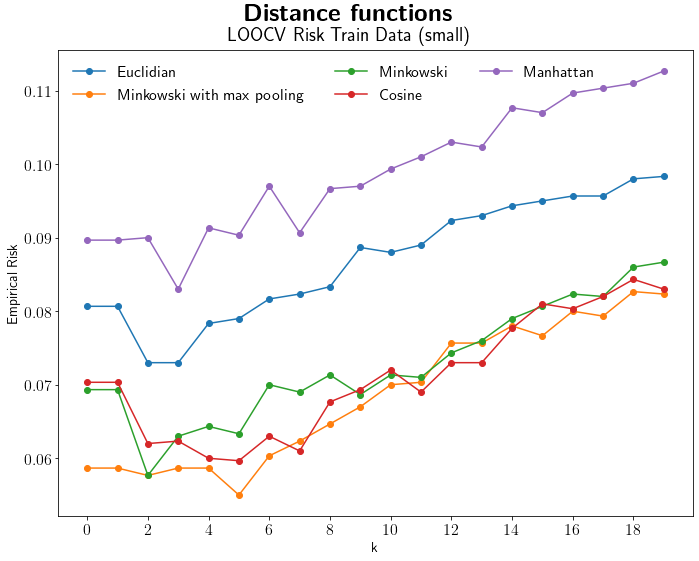

In [166]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
# fig.suptitle('Minkowski Distance\nLOOCV Train Data', fontsize=TITLE_SIZE)
# fig.suptitle(r"""\Huge{Minkowski Distance} \newline  \large{Small subtitle !}""", ha='center')

fig.suptitle(
    r"\Huge{\textbf{Distance functions}}" "\n" r"LOOCV Risk Train Data (small)",
#     y=1.01
)

# ax1.set_title('LOOCV Train Data', fontsize=AX_TITLE_SIZE)
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(0, len(eucl_train_LOOCV[:,1])+1, 2)])
for i, p in enumerate(combined_risk):
    ax1.plot(
        p,
        marker='o',
        label=f'{combined[i]}'
    )

ax1.legend(
    loc='upper left',
    ncol=3,
    frameon=False
)

fig.tight_layout()
fig.subplots_adjust(top=.905)
fig.savefig(
    r'../figures/QD_2.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)

## Question E

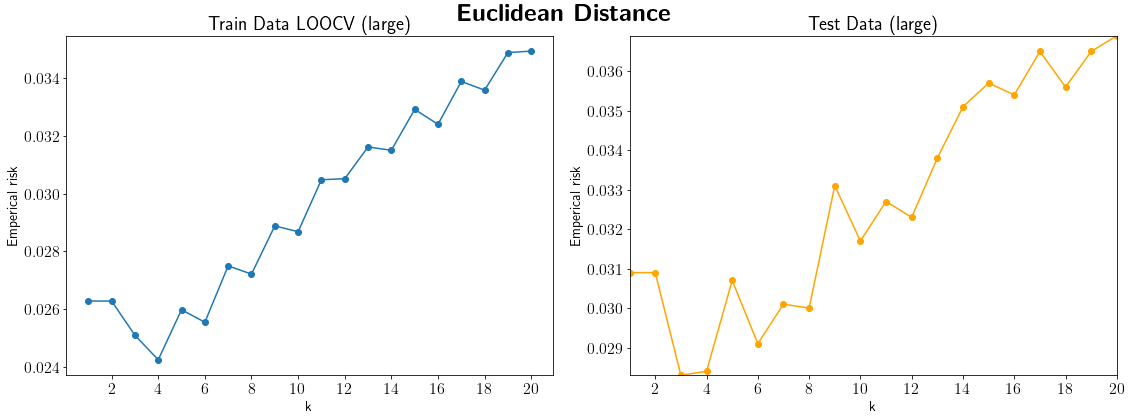

In [167]:
eucl_test = get_data('euclidian', test=True, small=False, LOOCV=True) # Not actually LOOCV
eucl_train = get_data('euclidian', test=False, small=False, LOOCV=True) # eucl_train[:, 0]/59999
eucl_train_risk = eucl_train[:, 0]/59999
eucl_test_risk = eucl_test[:, 0]/10000

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle(r'\Huge{\textbf{Euclidean Distance}}', )

ax1.set_title(r'Train Data LOOCV (large)')
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Emperical risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(0, len(eucl_train[:,1])+1, 2)])
ax1.plot(eucl_train[:,1], eucl_train_risk, marker='o')

ax2.set_title(r'Test Data (large)')
ax2.set_xlabel('k', fontsize=LABEL_SIZE)
ax2.set_ylabel('Emperical risk', fontsize=LABEL_SIZE)
ax2.set_xticks([x for x in range(0, len(eucl_test[:,1])+1, 2)])
ax2.plot(eucl_test[:,1], eucl_test_risk, marker='o', color='orange')
plt.autoscale(tight=True)


fig.tight_layout()
fig.savefig(
    r'../figures/QE.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)

## Question G

In [168]:
test = []
train = []
train_risk = []
ks = []
for k in range(1, 11):
    ks.append(k)
    min_train_LOOCV = get_data(f'PCA_euclidian_{k}', test=False, small=True, LOOCV=True)
    min_test = get_data(f'PCA_euclidian_{k}', test=True, small=True, LOOCV=True)
    min_train_LOOCV_risk = min_train_LOOCV[:, 0]/2999
    test.append(min_test)
    train.append(min_train_LOOCV)
    train_risk.append(min_train_LOOCV_risk)

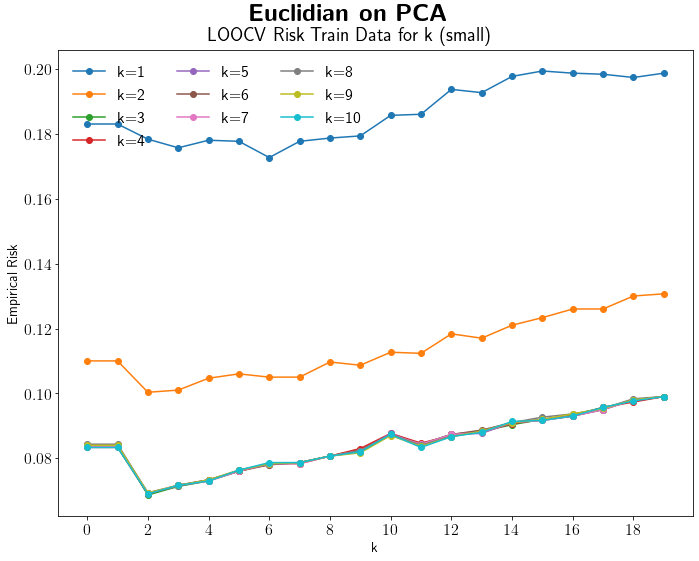

In [173]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
# fig.suptitle('Minkowski Distance\nLOOCV Train Data', fontsize=TITLE_SIZE)
# fig.suptitle(r"""\Huge{Minkowski Distance} \newline  \large{Small subtitle !}""", ha='center')

fig.suptitle(
    r"\Huge{\textbf{Euclidian on PCA}}" "\n" r"LOOCV Risk Train Data for k (small)",
#     y=1.01
)

# ax1.set_title('LOOCV Train Data', fontsize=AX_TITLE_SIZE)
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(0, len(eucl_train_LOOCV[:,1])+1, 2)])
for i, p in enumerate(train_risk):
    ax1.plot(
        p,
        marker='o',
        label=f'k={ks[i]}'
    )

ax1.legend(
    loc='upper left',
    ncol=3,
    frameon=False
)

fig.tight_layout()
fig.subplots_adjust(top=.905)
fig.savefig(
    r'../figures/QG.png',
    bbox_size='tight',
    dpi=350,
    transparent=True,
    pad_inches=0
)